## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master $ ```


## Problem 2: Sales Data Analysis

In [37]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
import numpy as np
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

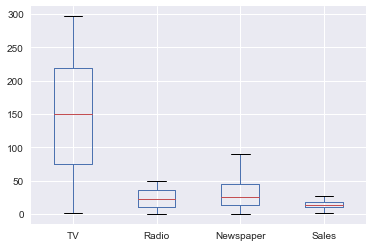

In [18]:
df.boxplot()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

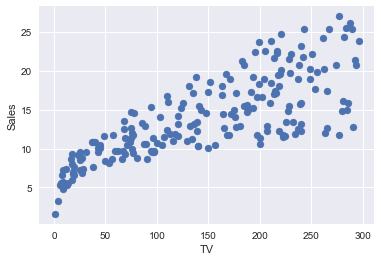

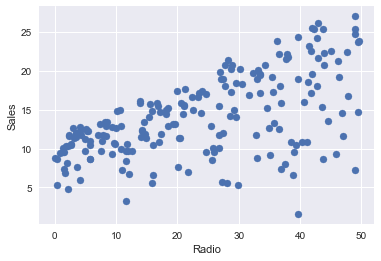

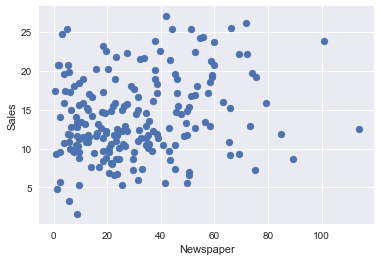

In [19]:
TV = df['TV']
Radio = df['Radio']
Newspaper = df['Newspaper']
Sales = df['Sales']

plt.figure(figsize=(6,4))
plt.scatter(TV, Sales)
plt.xlabel('TV')
plt.ylabel('Sales')

plt.figure(figsize=(6,4))
plt.scatter(Radio, Sales)
plt.xlabel('Radio')
plt.ylabel('Sales')

plt.figure(figsize=(6,4))
plt.scatter(Newspaper, Sales)
plt.xlabel('Newspaper')
plt.ylabel('Sales')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b6de048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d53e128>]], dtype=object)

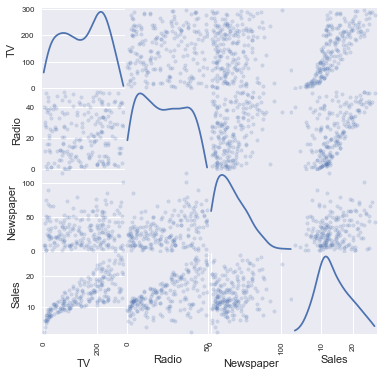

In [206]:
from pandas.tools.plotting import scatter_matrix 
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

Which of the variables seem correlated with one another? Which don't? Explain your answer
- TV and Sales, Radio and Sales seem correlated with one another, because as either TV or Radio advertising dollar increases, the sales number increases as well.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [207]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [40]:
y = df['Sales']

b) Set X to be just the features described above in df

In [39]:
X = df[['TV','Radio','Newspaper']]

c) Randomly split data into training and testing - 80% training, 20% testing.

In [30]:
# train=df.sample(frac=0.8,random_state=200)
# test=df.drop(train.index)

# X_train = train[['TV','Radio','Newspaper']]
# X_test = test[['TV','Radio','Newspaper']]

# y_train = train['Sales']
# y_test = test['Sales']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

d) Train model on training data, and make predictions on testing data

In [31]:
regr = LinearRegression(normalize=False)
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

Coefficients: 
 [ 0.04644725  0.18867632  0.00073603]
Residual sum of squares: 2.62
Variance score: 0.90


e) Evalute the R^2 on training data. Is this good? Bad? Why?

- The R^2 looks good on the training data, with a value of 0.9, which is very close to 1. A R^2 = 1 model explains all the variability of the response data around its mean.

In [32]:
from sklearn.metrics import r2_score
r2_score(y_test, regr.predict(X_test))

0.90419370710074098

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

- It looks like a good model, the predictions and actual values are very close to each other. The above R^2 value also explains the scatter plot.

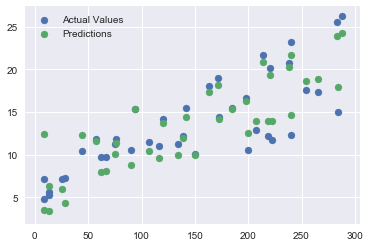

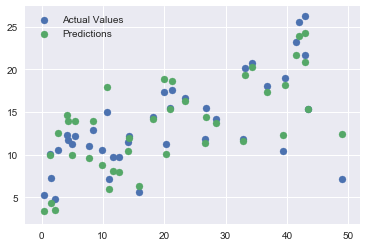

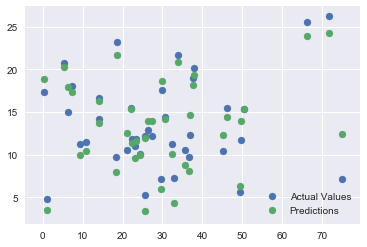

In [33]:
aTV = plt.scatter(X_test['TV'],y_test, label='Actual Values')
pTV = plt.scatter(X_test['TV'],regr.predict(X_test), label='Predictions')
plt.legend((aTV,pTV), ('Actual Values', 'Predictions'))

plt.figure(figsize=(6,4))
aRadio = plt.scatter(X_test['Radio'],y_test, label='Actual Values')
pRadio = plt.scatter(X_test['Radio'],regr.predict(X_test), label='Predictions')
plt.legend((aRadio,pRadio), ('Actual Values', 'Predictions'))

plt.figure(figsize=(6,4))
aNewspaper = plt.scatter(X_test['Newspaper'],y_test, label='Actual Values')
pNewspaper = plt.scatter(X_test['Newspaper'],regr.predict(X_test), label='Predictions')
plt.legend((aRadio,pRadio), ('Actual Values', 'Predictions'))

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

- The importance of features can be measured by comparing the coefficients (i.e. regr.coef), and the larger the absolute value, the feature is more important (TV > Radio > Newspaper). 
- We can evaluate our model from the result of R^2/RMSE.
- Things needs to be check before making conclusion: 1) whether columns are normalized, so we can compare it at the same scale 2) make sure there is no interaction/dependence betweent the features 3) cross-validate the data sets

In [34]:
from sklearn import preprocessing
standardized_X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(standardized_X, y, test_size=0.2)
regr = LinearRegression(normalize=False)
regr.fit(X_train, y_train)

print(regr.coef_)
df.corr()


[ 3.8813662   2.90568558 -0.10160093]


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

- See g)

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

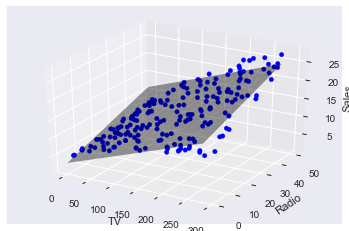

In [77]:
# from matplotlib import cm
# from mpl_toolkits.mplot3d import axes3d
# from mpl_toolkits.mplot3d.art3d import Poly3DCollection
# import matplotlib.font_manager
# import matplotlib.patches as mpatches
# import matplotlib.pyplot as plt

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(df['TV'],df['Radio'],df['Sales'])

# x_surf = np.linspace(df.TV.min(), df.TV.max(), 100)
# y_surf = np.linspace(df.Radio.min(), df.Radio.max(), 100)
# x_surf, y_surf = np.meshgrid(x_surf, y_surf)
# z_surf = np.sqrt(x_surf+y_surf)
# ax.plot_surface(x_surf, y_surf, z_surf, cmap=cm.hot);

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

model = sm.ols(formula='Sales ~ TV + Radio', data = df)
fit = model.fit()

fit.summary()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(df.TV.min(), df.TV.max(), 20)                # generate a mesh
y_surf = np.arange(df.Radio.min(), df.Radio.max(), 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'Radio': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)

ax.scatter(csv['TV'], csv['Radio'], csv['Sales'],
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

plt.show()


## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

- If the learning rate is set to be 0.01, then it does not converge. The reason is that the learning rate is too fast (the step is too wide), so that it does not capture the rate of change (never reaches the minimum point). However, if the learning rate is set to be really small (i.e. 0.00000001), then it takes too long (maybe infinite long) to converge, analogous of taking a LOT of miniscule baby steps before finally get to the minimum.

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.0470759787794631, m = 1.4785668413714852, error = 112.63985275851445


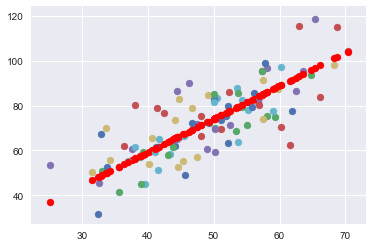

In [14]:
from numpy import *

#y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("../APMAE4990/data/data.csv", delimiter=",")
    learning_rate = 0.0003
    # learning_rate = 0.01 Does NOT Converge
    # learning_rate = 0.000000001 Program takes too long
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = -2.1858247925415498e+167, m = -1.1121132929727182e+169, error = inf


//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: overflow encountered in double_scalars


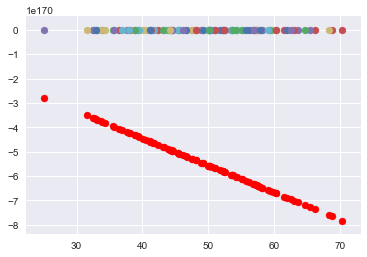

In [7]:
def run(num_iterations):
    points = genfromtxt("../APMAE4990/data/data.csv", delimiter=",")
    learning_rate = 0.01 #Does NOT Converge
    # learning_rate = 0.000000001 Program takes too long
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.011490847112648363, m = 0.5815775397751681, error = 2119.9793173686226


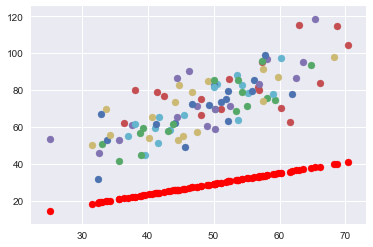

In [22]:
def run(num_iterations):
    points = genfromtxt("../APMAE4990/data/data.csv", delimiter=",")
    learning_rate = 0.000001 #Program takes too long to converge
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


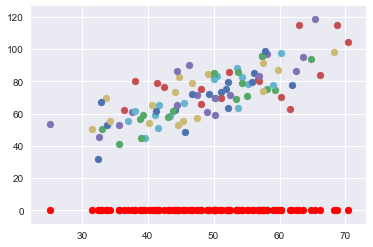

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


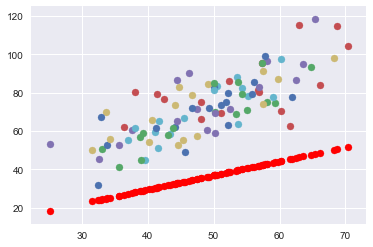

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


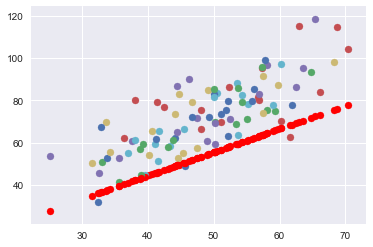

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


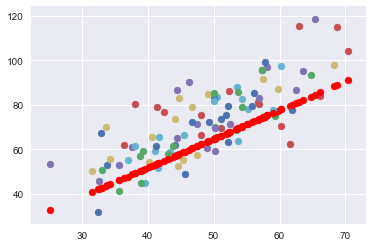

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


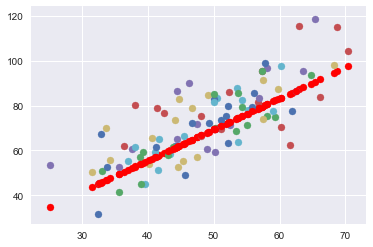

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


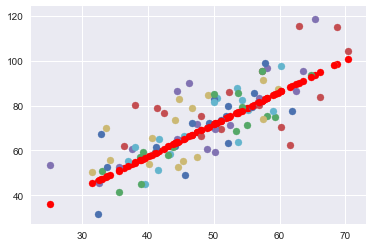

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


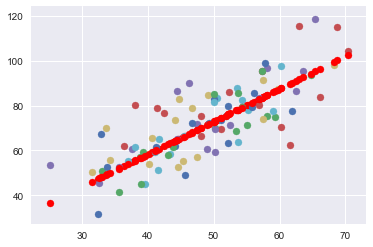

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


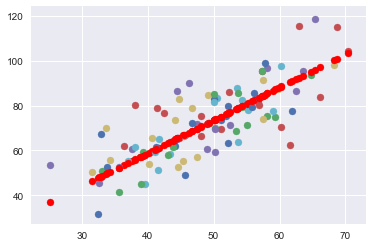

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


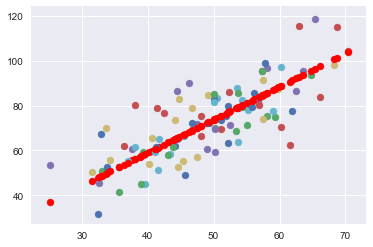

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


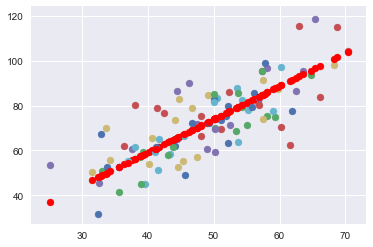

In [21]:
# Use this to visually discuss convergence rate based on learning rate

for num in range(0,10):
    run(num)
    plt.show()


## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

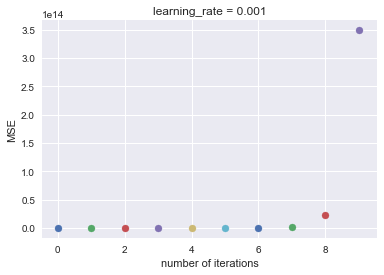

In [49]:
def Error(num_iterations):
    points = genfromtxt("../APMAE4990/data/data.csv", delimiter=",")
    learning_rate = 0.001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    error = compute_error_for_line_given_points(b, m, points)
    plt.scatter(num_iterations,error)
    plt.xlabel("number of iterations")
    plt.ylabel("MSE")

for num in range(0,10):
    Error(num)
    plt.title('learning_rate = 0.001')

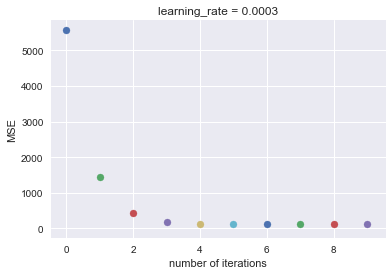

In [50]:
def Error(num_iterations):
    points = genfromtxt("../APMAE4990/data/data.csv", delimiter=",")
    learning_rate = 0.0003
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    error = compute_error_for_line_given_points(b, m, points)
    plt.scatter(num_iterations,error)
    plt.xlabel("number of iterations")
    plt.ylabel("MSE")

for num in range(0,10):
    Error(num)
    plt.title('learning_rate = 0.0003')

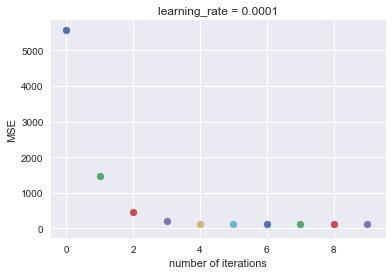

In [51]:
def Error(num_iterations):
    points = genfromtxt("../APMAE4990/data/data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    error = compute_error_for_line_given_points(b, m, points)
    plt.scatter(num_iterations,error)
    plt.xlabel("number of iterations")
    plt.ylabel("MSE")

for num in range(0,10):
    Error(num)
    plt.title('learning_rate = 0.0001')

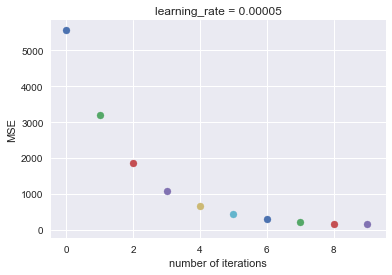

In [52]:
def Error(num_iterations):
    points = genfromtxt("../APMAE4990/data/data.csv", delimiter=",")
    learning_rate = 0.00005
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    error = compute_error_for_line_given_points(b, m, points)
    plt.scatter(num_iterations,error)
    plt.xlabel("number of iterations")
    plt.ylabel("MSE")

for num in range(0,10):
    Error(num)
    plt.title('learning_rate = 0.00005')

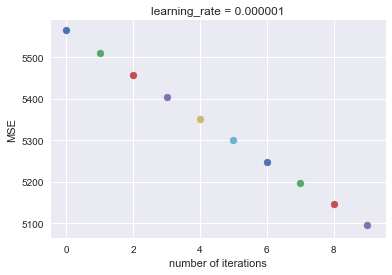

In [53]:
def Error(num_iterations):
    points = genfromtxt("../APMAE4990/data/data.csv", delimiter=",")
    learning_rate = 0.000001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    error = compute_error_for_line_given_points(b, m, points)
    plt.scatter(num_iterations,error)
    plt.xlabel("number of iterations")
    plt.ylabel("MSE")

for num in range(0,10):
    Error(num)
    plt.title('learning_rate = 0.000001')

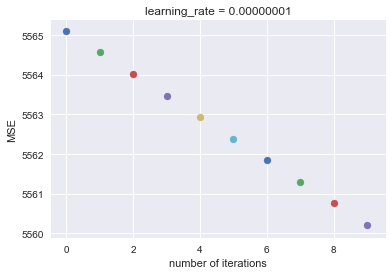

In [54]:
def Error(num_iterations):
    points = genfromtxt("../APMAE4990/data/data.csv", delimiter=",")
    learning_rate = 0.00000001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    error = compute_error_for_line_given_points(b, m, points)
    plt.scatter(num_iterations,error)
    plt.xlabel("number of iterations")
    plt.ylabel("MSE")

for num in range(0,10):
    Error(num)
    plt.title('learning_rate = 0.00000001')